# Nanodegree Engenheiro de Machine Learning
## Projeto final
Gleber Antunes Baptistella  
Fevereiro de 2018

## I. Definição

### Visão geral do projeto
A área de Reconhecimento de Atividades Humanas (RAH) está em franca expansão, com dispositivos e sensores cada vez mais fazendo parte do dia-a-dia das pessoas.

Suas pesquisas podem ser aplicadas em diversas áreas, entre elas da saúde (melhorando a detecção e diagnósticos de doenças) e de práticas esportivas, visando a melhoria do desempenho do indivíduo.

### Descrição do problema
Este projeto tem como objetivo identificar uma determinada postura de um indivíduo após a coleta de dados através de sensores que foram previamente dispostos no corpo da pessoa.
O embasamento deste projeto encontra-se em [**http://groupware.les.inf.puc-rio.br/har**](http://groupware.les.inf.puc-rio.br/har), bem como o dataset utilizado.

O dataset disponibilizado está em formato CSV e está bem estruturado, facilitando a leitura.

A saída do processamento é um valor categórico que representa a posição do indivíduo e suas possibilidades são: sitting, sittingdown, standing, standingup, walking. Em português seria algo como: sentado, sentando, de pé, levantando e andando. 

Dessa forma, trata-se de um problema de aprendizado supervisionado de classificação.

Irei avaliar outros algoritmos de classificação diferentes do usado no artigo da PUC Rio, buscando um desempenho superior ao obtido.

### Modelo de referência (benchmark)
Neste projeto teremos dois modelos de referência:

1. O resultado do artigo original
2. A execução sem refinamento dos outros três algoritmos.

Enquanto tentamos superar o resultado do artigo original (o que pode não ser possível), tentaremos refinar os outros três algoritmos através de mudanças em seus hiper-parâmetros para obtermos resultados melhores.

### Métricas de avaliação
As métricas para avaliação dos modelos serão:

1. Recall
2. Precision
3. F1
4. ROC


## II. Análise

### Exploração de dados

No problema apresentado temos informações pessoais, bem como informações dos eixo x, y e z de cada sensor disposto pelo corpo dos indivíduos.

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from __future__ import division
%matplotlib inline
sns.set()
# Lendo os dados de treinamento
wearable_data = pd.read_csv("dataset-har-PUC-Rio-ugulino.csv", delimiter=';')
print("Dados de treinamento lidos com sucesso!")
print("Total de linhas: ",len(wearable_data.index))

Dados de treinamento lidos com sucesso!
Total de linhas:  165633


In [2]:
wearable_data.describe(include='all')

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
count,165633,165633,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633
unique,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,debora,Woman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sitting
freq,51577,101374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50631
mean,NaN,NaN,38.265146,1.639712,70.819408,26.188522,-6.649327,88.293667,-93.164611,-87.827504,-52.065047,-175.055200,17.423515,104.517167,-93.881726,-167.641448,-92.625171,-159.650891,NaN
std,NaN,NaN,13.184091,0.052820,11.296527,2.995777,11.616238,23.895829,39.409423,169.435194,205.159763,192.816615,52.635388,54.155843,45.389646,38.311342,19.968610,13.221036,NaN
min,NaN,NaN,28.000000,1.580000,55.000000,22.000000,-306.000000,-271.000000,-603.000000,-494.000000,-517.000000,-617.000000,-499.000000,-506.000000,-613.000000,-702.000000,-526.000000,-537.000000,NaN
25%,NaN,NaN,28.000000,1.580000,55.000000,22.000000,-12.000000,78.000000,-120.000000,-35.000000,-29.000000,-141.000000,9.000000,95.000000,-103.000000,-190.000000,-103.000000,-167.000000,NaN
50%,NaN,NaN,31.000000,1.620000,75.000000,28.400000,-6.000000,94.000000,-98.000000,-9.000000,27.000000,-118.000000,22.000000,107.000000,-90.000000,-168.000000,-91.000000,-160.000000,NaN
75%,NaN,NaN,46.000000,1.710000,83.000000,28.600000,0.000000,101.000000,-64.000000,4.000000,86.000000,-29.000000,34.000000,120.000000,-80.000000,-153.000000,-80.000000,-153.000000,NaN


Não há missing values. Todos as colunas possuem o mesmo valor de _count_ da quantidade total de linhas (165.633).

Abaixo podemos ver os tipos de dados de cada variável.

In [3]:
wearable_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165633 entries, 0 to 165632
Data columns (total 19 columns):
user                  165633 non-null object
gender                165633 non-null object
age                   165633 non-null int64
how_tall_in_meters    165633 non-null float64
weight                165633 non-null int64
body_mass_index       165633 non-null float64
x1                    165633 non-null int64
y1                    165633 non-null int64
z1                    165633 non-null int64
x2                    165633 non-null int64
y2                    165633 non-null int64
z2                    165633 non-null int64
x3                    165633 non-null int64
y3                    165633 non-null int64
z3                    165633 non-null int64
x4                    165633 non-null int64
y4                    165633 non-null int64
z4                    165633 non-null int64
class                 165633 non-null object
dtypes: float64(2), int64(14), object(3)
memor

## III. Metodologia

### Dividindo _features_ e o _target_

O target trata-se da coluna _class_. Das _features_ removi a coluna _user_, já que acredito não fazer muito sentido para o modelo. Em seguida iremos substituir as variáveis categóricas que estão no formato _String_ para o formato numérico.

In [4]:
y_all = wearable_data['class'].to_frame()
X_all = wearable_data.drop(['user', 'class'], axis=1)

gender_nums = {"gender":{"Woman": 0, "Man": 1}}
X_all.replace(gender_nums, inplace=True)

class_nums = {"class":{'sitting':0, 'sittingdown':1, 'standing':2, 'standingup':3, 'walking':4}}
y_all.replace(class_nums, inplace=True)

### Verificando se há desbalanceamento do _target_
Em muitos casos encontramos situações onde uma determinada classe do _target_ possuem poucas amostras. Isso pode influenciar no resultado do modelo.

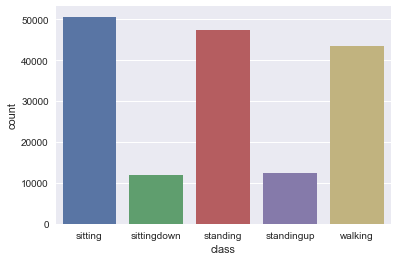

In [5]:
sns.countplot(x="class", data=wearable_data)

In [5]:
# Quebrando o dataset em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.35, random_state=1973)

Como podemos ver no gráfico acima, as classes "sittingdown" e "standingup" possuem uma quantidade de amostras bem menor que "sitting", "standing" e "walking".

Nesta situação podemos fazer o balanceamento reduzindo a quantidade de registros das classes que possuem maior representação, ou criar dados sintéticos para as classes sub-representadas.

Neste projeto iremos criar dados sintéticos com a biblioteca [imblearn.over_sampling.SMOTE](http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.over_sampling.SMOTE.html).

In [6]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support

def run_all_models(_X_train, _y_train, _X_test, _y_test):
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('Randomforest', RandomForestClassifier()))
    models.append(('NB', GaussianNB()))
    for name, model in models:
        score_array =[]

        model.fit(_X_train, _y_train.values.ravel())
        y_pred = model.predict(_X_test)
        score = precision_recall_fscore_support(_y_test, y_pred, average='macro')
        score_array.append([score[0], score[1], score[2]])
            
        print('----------->', name)
        avg_score = np.mean(score_array,axis=0)
        print("Precision:", avg_score[0])
        print("Recall:", avg_score[1])
        print("F1:", avg_score[2])

In [7]:
run_all_models(X_train, y_train, X_test, y_test)

-----------> KNN
Precision: 0.990119049511738
Recall: 0.9905480853192931
F1: 0.9903172822042784
-----------> Randomforest
Precision: 0.9911380223639622
Recall: 0.9898637238583985
F1: 0.990487010198686
-----------> NB
Precision: 0.6738075433007523
Recall: 0.646730218948983
F1: 0.6452690499006304


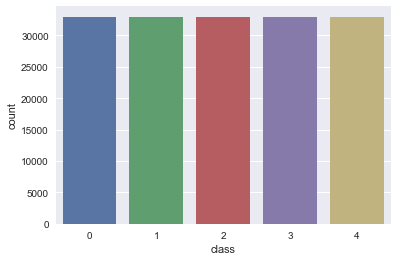

In [8]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=73)
X_res, y_res = sm.fit_sample(X_train, y_train.values.ravel())
X_train = pd.DataFrame(X_res, columns=X_train.columns)
y_train = pd.DataFrame(y_res, columns=y_train.columns)
sns.countplot(x="class", data=y_train)

Agora todas as classes estão balanceadas.

### Estabelecendo a baseline

A _baseline_ será a execução dos algoritmos GaussianNB, RandomForestClassifier e KNeighborsClassifier sem refinamento dos mesmos, isto é, executarão com seus valores _default_.

Será criada afunção `run_all_models` que irá criar o modelo e a predição para os algoritmos escolhidos.

Para validar o modelo será feito o cross validation com 10 _folds_ utilizando o [sklearn.model_selection.StratifiedKFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

In [9]:
#from sklearn import model_selection
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import precision_recall_fscore_support

#def run_all_models(X, y):
#    models = []
#    models.append(('KNN', KNeighborsClassifier()))
#    models.append(('Randomforest', RandomForestClassifier()))
#    models.append(('NB', GaussianNB()))
#    for name, model in models:
#        score_array =[]

#        kfold = model_selection.StratifiedKFold(n_splits=10, random_state=1973)
#        for train_idx, test_idx in kfold.split(X, y):
#            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
#            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]  
#            model.fit(X_train, y_train.values.ravel())
#            y_pred = model.predict(X_test)
#            score = precision_recall_fscore_support(y_test, y_pred, average='macro')
#            score_array.append([score[0], score[1], score[2]])
#            
#        print('----------->', name)
#        avg_score = np.mean(score_array,axis=0)
#        print("Precision:", avg_score[0])
#        print("Recall:", avg_score[1])
#        print("F1:", avg_score[2])
run_all_models(X_train, y_train, X_test, y_test)

-----------> KNN
Precision: 0.9891054642044456
Recall: 0.9926206150234422
F1: 0.9908387584994323
-----------> Randomforest
Precision: 0.9917632744873419
Recall: 0.991647276673913
F1: 0.9917024796807636
-----------> NB
Precision: 0.6486098674886607
Recall: 0.6545688514056506
F1: 0.6340500627618322


### Resultado da baseline

Excluindo o GaussianNB, que teve um desempenho ruim, o KNN e o Random Forest partem de um _baseline_ bastante bom, com o F1 acima de 0.98 (num _range_ de 0 a 1).

|              | Precision | Recall | F1     |
|--------------|-----------|--------|--------|
| KNN          |    0.9891 | 0.9926 | 0.9908 |
| RandomForest |    0.9911 | 0.9908 | 0.9909 |
| GaussianNB   |    0.6486 | 0.6545 | 0.6340 |

## Tratamento dos dados

A partir desta sessão iremos trabalhar com os dados, normalizando-os e reduzindo a dimensionalidade

### Normalizando a escala dos dados 

In [10]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.head(3)

,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4
0,0.0,0.00000,0.0,0.0,0.000000,0.334969,0.360697,0.565089,0.220269,0.188424,0.290934,0.530060,0.601173,0.499511,0.817638,0.705882,0.759109
1,0.0,0.00000,0.0,0.0,0.000000,0.369325,0.442786,0.476331,0.508790,0.743842,0.707713,0.522044,0.603128,0.487781,0.763827,0.718954,0.795547
2,1.0,0.06383,1.0,1.0,0.969697,0.382822,0.425373,0.535503,0.488108,0.600985,0.803789,0.563126,0.548387,0.508309,0.913303,0.640523,0.740891


Neste momento todos os dados estão normalizados numa escala de 0 a 1.

Com isso, iremos reexecutar todos os modelos.

In [11]:
run_all_models(X_train_scaled, y_train, X_test_scaled, y_test)

-----------> KNN
Precision: 0.9888923920594042
Recall: 0.9926880129209016
F1: 0.9907641475186637
-----------> Randomforest
Precision: 0.991811247593751
Recall: 0.9922157865671283
F1: 0.9920074278557266
-----------> NB
Precision: 0.6485774202797937
Recall: 0.654520866760737
F1: 0.6340176192762386


### Resultados após o Scaling

Em todas as métricas houve uma pequena perda entre a baseline e o novo resultado.

|              | Precision | Recall | F1     |
|--------------|-----------|--------|--------|
| KNN          |    0.9845 | 0.9829 | 0.9829 |
| RandomForest |    0.9868 | 0.9854 | 0.9853 |
| GaussianNB   |    0.6003 | 0.6012 | 0.5572 |

### Importância das _Features_

No _dataset_ nem todas as _features_ tem a mesma importância para a definição do modelo. Aqui vamos verificar as variáveis mais relevantes e excluir as menos relevantes.

Será utilizado o algoritmo de árvore de classificação [sklearn.ensemble.ExtraTreesClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) para definir as variáveis com maior importância dentro do dataset

1. feature 10 (0.121771)
2. feature 14 (0.099334)
3. feature 7 (0.095892)
4. feature 9 (0.091284)
5. feature 6 (0.080847)
6. feature 16 (0.077145)
7. feature 12 (0.071763)
8. feature 13 (0.071387)
9. feature 5 (0.063293)
10. feature 8 (0.057865)
11. feature 15 (0.052048)
12. feature 11 (0.043667)
13. feature 4 (0.016393)
14. feature 2 (0.015555)
15. feature 0 (0.015236)
16. feature 3 (0.014364)
17. feature 1 (0.012155)


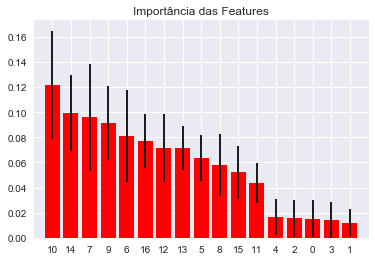

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

feature_importance = ExtraTreesClassifier(n_estimators=150,
                              random_state=0)
feature_importance = feature_importance.fit(X_train_scaled, y_train.values.ravel())
importances = feature_importance.feature_importances_
std = np.std([tree.feature_importances_ for tree in feature_importance.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X_train_scaled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Importância das Features")
plt.bar(range(X_train_scaled.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), indices)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()

In [13]:
X_all.columns[[10,14,7,9,6,16,12,13,5,8,15,11,4,2,0,3,1]]

Index(['z2', 'x4', 'z1', 'y2', 'y1', 'z4', 'y3', 'z3', 'x1', 'x2', 'y4', 'x3',
       'body_mass_index', 'how_tall_in_meters', 'gender', 'weight', 'age'],
      dtype='object')

Pelo gráfico podemos ver que as variávies cujo índice estão no _range_ de 0 a 4 pouco influenciam no modelo. Tratam-se de variáveis de características pessoais dos dados coletados: altura em metros (how_tall_in_meters), índice de massa corpórea (body_mass_index), peso (weight), gênero (gender) e idade (age). Para continuarmos os testes, irei excluir estas variáveis e manter apenas as variáveis referentes aos eixos e reexecutar os algoritmos.|

In [14]:
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=X_train_scaled.columns)
X_test_scaled.head()

,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4
0,0.0,0.000000,0.000000,0.000000,0.000000,0.370552,0.463930,0.496055,0.524302,0.746305,0.669824,0.541082,0.595308,0.515152,0.765321,0.722222,0.769231
1,0.0,0.000000,0.000000,0.000000,0.000000,0.375460,0.465174,0.496055,0.525336,0.745074,0.673884,0.533066,0.594330,0.517107,0.763827,0.720588,0.763158
2,1.0,0.063830,1.000000,1.000000,0.969697,0.349693,0.471393,0.472387,0.016546,0.027094,0.062246,0.491984,0.605083,0.491691,0.727952,0.815359,0.740891
3,0.0,0.382979,0.307692,0.714286,1.000000,0.371779,0.468905,0.506903,0.516029,0.745074,0.669824,0.521042,0.600196,0.506354,0.787743,0.712418,0.763158
4,0.0,0.382979,0.307692,0.714286,1.000000,0.365644,0.415423,0.547337,0.501551,0.656404,0.783491,0.507014,0.589443,0.522972,0.811659,0.686275,0.748988


In [15]:
X_train_reduced = X_train_scaled[X_train_scaled.columns[[10,14,7,9,6,16,12,13,5,8,15,11]]]
X_test_reduced = X_test_scaled[X_test_scaled.columns[[10,14,7,9,6,16,12,13,5,8,15,11]]]
run_all_models(X_train_reduced, y_train, X_test_reduced, y_test)

-----------> KNN
Precision: 0.9853222183518808
Recall: 0.9904770791198525
F1: 0.9878494353571577
-----------> Randomforest
Precision: 0.9874642568260377
Recall: 0.9879408190334209
F1: 0.9876944412810229
-----------> NB
Precision: 0.6465457043622723
Recall: 0.6532029235926954
F1: 0.6316610972535354


### Resultado apó as remoção das variáveis

Em todas as métricas houve uma pequena perda. Contudo não são perdas significativas ao meu ver.

|              | Precision | Recall | F1     |
|--------------|-----------|--------|--------|
| KNN          |    0.9838 | 0.9820 | 0.9820 |
| RandomForest |    0.9820 | 0.9801 | 0.9800 |
| GaussianNB   |    0.6303 | 0.6157 | 0.5739 |

### Reduzindo a dimensionalidade

Já reduzimos os números de _features_ originais de 18 para 12. Apesar do desempenho ter sido um pouco pior, lembramos aqui que não foi feito nenhum refinamento nos algoritmos.

Agora tentaremos reduzir ainda mais a dimensionalidade aplicando o PCA, buscando entender com quantas variáveis a variância dos dados é explicada.

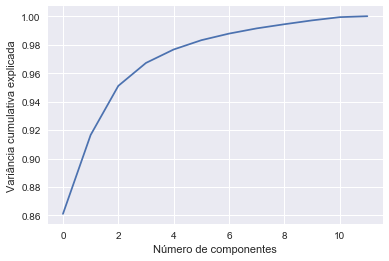

In [16]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_reduced)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Variância cumulativa explicada')
plt.show()

Como podemos ver pelo gráfico, mais de 99% da variância é explicada por 8 ou 9 componentes. Portanto criaremos um dataset com 8 componentes principais e rodaremos novamente os modelos.

In [22]:
pca = PCA(n_components = 10)
pca.fit(X_train_reduced)
principalComponentsTrain = pca.transform(X_train_reduced)
principalComponentsTest = pca.transform(X_test_reduced)
X_train_pca = pd.DataFrame(data=principalComponentsTrain, 
                    columns=['p1','p2','p3','p4','p5','p6','p7','p8','p9', 'p10'])
X_test_pca = pd.DataFrame(data=principalComponentsTest, 
                    columns=['p1','p2','p3','p4','p5','p6','p7','p8','p9', 'p10'])

In [23]:
run_all_models(X_train_pca, y_train, X_test_pca, y_test)

-----------> KNN
Precision: 0.9835214134531001
Recall: 0.9891757652854134
F1: 0.9862888132989797
-----------> Randomforest
Precision: 0.9803811404403264
Recall: 0.9828117137291628
F1: 0.9815877649126671
-----------> NB
Precision: 0.7485047854320283
Recall: 0.7249735138629426
F1: 0.7194625656526091


### Resultados após o PCA

Mais uma vez houve uma perda da performance dos indicadores, apenas o GaussianNB teve uma melhora, contudo os algoritmos rodaram substancialmente mais rápidos. Reforço que ainda não foi feita a hiperparametrização dos algoritmos.

|              | Precision | Recall | F1     |
|--------------|-----------|--------|--------|
| KNN          |    0.9795 | 0.9782 | 0.9782 |
| RandomForest |    0.9690 | 0.9657 | 0.9656 |
| GaussianNB   |    0.6874 | 0.6647 | 0.6298 |

## Refinamento dos modelos

Para o refinamento dos modelos vamos partir do último dataset que temos após a execução do PCA, ou seja, `X_pca` e `y_all`.

A ideia nesta sessão é utilizar o objeto [sklearn.model_selection.GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para refinar os hiper-parâmetros dos algoritmos.


In [24]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, confusion_matrix, recall_score, f1_score
from sklearn.multiclass import OneVsRestClassifier
import itertools
def refine_model(model, parameters, _X_train, _y_train, _X_test, _y_test):
    grid_search = GridSearchCV(model, parameters, n_jobs=4)
    grid_search.fit(_X_train, _y_train.values.ravel())
    be = grid_search.best_estimator_
    pred = be.predict(_X_test)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(confusion_matrix(_y_test, pred), classes=wearable_data['class'].unique(),
                      title='Confusion matrix, without normalization')
    np.set_printoptions(precision=2)
    plt.show()

    print("Precision:",precision_score(_y_test, pred, average="macro"))
    print("Recall:", recall_score(_y_test, pred, average="macro"))
    print("F1 Score:", f1_score(_y_test, pred, average="macro"))


    return be

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
# Quebrando o dataset em treino e teste
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X_pca, y_all, test_size=0.35, random_state=1973)

Confusion matrix, without normalization
[[17625     9     0    13     0]
 [    1  4118     4    40     5]
 [    0     7 16597    33    13]
 [    1    46    15  4235    14]
 [    0    75   148    63 14910]]


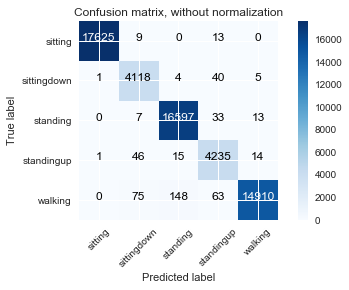

Precision: 0.9843196918837368
Recall: 0.9894247844244521
F1 Score: 0.9868212051177133


In [28]:
# Definindo os hiperparâmetros do KNeighborsClassifier
parameters = {'n_neighbors':[5, 6, 7, 8, 9], 'metric': ['minkowski', 'euclidean', 'manhattan'], 'weights': ['uniform', 'distance']}
model_knn = refine_model(KNeighborsClassifier(), parameters, X_train_pca, y_train, X_test_pca, y_test)

Confusion matrix, without normalization
[[17616     3     0    28     0]
 [    1  4079     5    56    27]
 [    0     3 16544    32    71]
 [    1    48    18  4212    32]
 [    0    42    57    28 15069]]


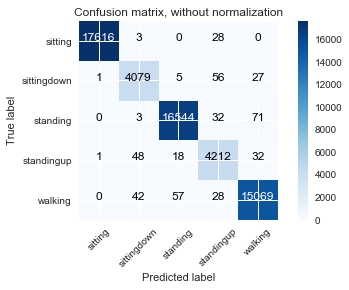

Precision: 0.9860938205387602
Recall: 0.9878403644480253
F1 Score: 0.9869614557625186


In [29]:
# Definindo os parâmetros do RandomForestClassifier
parameters = {"n_estimators" : [10,250]
            ,"min_samples_split" :[2,4,6]
            ,"min_samples_leaf": [3,5]
            ,"criterion": ('gini','entropy')}
model_rf = refine_model(RandomForestClassifier(), parameters, X_train_pca, y_train, X_test_pca, y_test)

O algoritmo [sklearn.naive_bayes.GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) não possui parâmetros para ser refinado com o GridSearchCV. Porém vamos criar o modelo para ser utilizado na próxima sessão.

In [30]:
# Definindo os parâmetros do RandomForestClassifier
model_gnb = GaussianNB()
model_gnb.fit(X_train_pca, y_train.values.ravel())
pred = model_gnb.predict(X_test_pca)
print("Precision:",precision_score(y_test, pred, average="macro"))
print("Recall:", recall_score(y_test, pred, average="macro"))
print("F1 Score:", f1_score(y_test, pred, average="macro"))

Precision: 0.7485047854320283
Recall: 0.7249735138629426
F1 Score: 0.7194625656526091


### Resultados após o refinamento

Após o refinamento os modelos feitos com o KNN e o Random Forest tiveram ganhos de performance, superando 0.99 para o F1. Segue a tabela abaixo:

|              | Precision | Recall | F1     |
|--------------|-----------|--------|--------|
| KNN          |    0.9935 | 0.9934 | 0.9934 |
| RandomForest |    0.9921 | 0.9920 | 0.9920 |
| GaussianNB   |    0.7188 | 0.6997 | 0.6631 |

Até aqui, o KNN parece ser o melhor algoritmo dentre os três analisados para o cenário apresentado.

## Scores por classe

Nesta sessão iremos rodar o modelo por classe do dataset. Vamos utilzar uma estratégia de classificação multi-classe chamada One-vs-all (ou One-vs-rest). Nesta estratégia é construido um classificador por classe. Para cada classificador a classe é modelada contra todas as outras classes. 

Utilizaremos o objeto [sklearn.multiclass.OneVsRestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html).

Nesta fase final, comparando os _scores_ por classe, poderemos fazer o _benchmark_ com o problema original elaborado pela PUC-Rio.

In [32]:
from sklearn.preprocessing import label_binarize
y_train_bin = label_binarize(y_train, y_train['class'].unique())
y_test_bin = label_binarize(y_test, y_test['class'].unique())
n_classes = y_train_bin.shape[1]
print(y_train_bin)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_bin, test_size=.35,
                                                    random_state=1973)

In [34]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score

def score_by_class(model, _X_train, _y_train, _X_test, _y_test):
    classifier = OneVsRestClassifier(model)
    classifier.fit(_X_train, _y_train)
    y_score = classifier.predict_proba(_X_test)
    y_pred = classifier.predict(_X_test)
    class_precision = dict()
    class_recall = dict()
    class_auc = dict()
    class_f1 = dict()
    for i in range(n_classes):
        class_auc[i] = roc_auc_score(_y_test[:, i],y_score[:, i])
        class_f1[i] = f1_score(_y_test[:, i], y_pred[:, i], average="macro")
        class_recall[i] = recall_score(_y_test[:, i], y_pred[:, i], average="macro")
        class_precision[i] = precision_score(_y_test[:, i], y_pred[:, i], average="macro")
        
    print("Precision:" , class_precision)
    print("Recall:", class_recall)
    print("F1 score:", class_f1)
    print("AUC score:", class_auc)


In [35]:
score_by_class(model_knn, X_train, y_train, X_test, y_test)

Precision: {0: 0.293654727971248, 1: 0.36807097567608854, 2: 0.33695637695439173, 3: 0.4496049968751344, 4: 0.45050500932604515}
Recall: {0: 0.2867116790087605, 1: 0.4536202701014948, 2: 0.4461959849020947, 3: 0.3448036885426609, 4: 0.3624961981683072}
F1 score: {0: 0.2901416728911311, 1: 0.4038498231279135, 2: 0.3834469698213798, 3: 0.39013012825560556, 4: 0.4013125854663748}
AUC score: {0: 0.2863849765258216, 1: 0.4549788151238012, 2: 0.44375594874632224, 3: 0.3429662027889385, 4: 0.3608631790981133}


In [36]:
score_by_class(model_rf, X_train, y_train, X_test, y_test)

Precision: {0: 0.2937671860678277, 1: 0.3625804949111504, 2: 0.33835312386117755, 3: 0.4497901777564253, 4: 0.4507801504699409}
Recall: {0: 0.28697788103189587, 1: 0.4535370731856685, 2: 0.4483162035834602, 3: 0.34658963700049555, 4: 0.36283703862868494}
F1 score: {0: 0.29033284775183926, 1: 0.4019904857273835, 2: 0.3848163132678557, 3: 0.39142377314741184, 4: 0.4013667105210747}
AUC score: {0: 0.24771269381767422, 1: 0.583339652842654, 2: 0.2663941699396489, 3: 0.32478238217952105, 4: 0.5084547281498031}


In [27]:
score_by_class(model_gnb, X_train, y_train, X_test, y_test)

Precision: {0: 0.90464223358754636, 1: 0.73528947627669916, 2: 0.78794027133027122, 3: 0.70106795268052569, 4: 0.82440360795520429}
Recall: {0: 0.96581352417982247, 1: 0.80460251849047515, 2: 0.88371316828264979, 3: 0.57142190396398918, 4: 0.80219382368465675}
F1 score: {0: 0.93058833084752623, 1: 0.75643030122464872, 2: 0.8161752100994224, 3: 0.57914477941642517, 4: 0.81249449175852262}
AUC score: {0: 0.98551900648210911, 1: 0.8849631909928769, 2: 0.94687958799001137, 3: 0.79634288700625722, 4: 0.91062808459613409}


### Resultados por classe

#### KNeighborsClassifier

|              | Precision | Recall | F1     | ROC AUC |
|--------------|-----------|--------|--------|---------|
| sitting      |    0.9998 | 0.9996 | 0.9997 |  0.9998 |
| sittingdown  |    0.9961 | 0.9979 | 0.9970 |  0.9992 |
| standing     |    0.9936 | 0.9959 | 0.9947 |  0.9981 |
| standingup   |    0.9944 | 0.9969 | 0.9956 |  0.9990 |
| walking      |    0.9959 | 0.9875 | 0.9923 |  0.9945 |

#### RandomForestClassifier

|              | Precision | Recall | F1     | ROC AUC |
|--------------|-----------|--------|--------|---------|
| sitting      |    0.9996 | 0.9987 | 0.9992 |  0.9999 |
| sittingdown  |    0.9950 | 0.9945 | 0.9948 |  0.9998 |
| standing     |    0.9945 | 0.9915 | 0.9930 |  0.9998 |
| standingup   |    0.9942 | 0.9901 | 0.9921 |  0.9997 |
| walking      |    0.9937 | 0.9878 | 0.9906 |  0.9996 |


#### GaussianNB

|              | Precision | Recall | F1     | ROC AUC |
|--------------|-----------|--------|--------|---------|
| sitting      |    0.9046 | 0.9658 | 0.9305 |  0.9855 |
| sittingdown  |    0.7352 | 0.8046 | 0.7564 |  0.8849 |
| standing     |    0.7879 | 0.8837 | 0.8161 |  0.9468 |
| standingup   |    0.7010 | 0.5714 | 0.5791 |  0.7963 |
| walking      |    0.8244 | 0.8021 | 0.8124 |  0.9106 |

#### Resultado final do estudo feito pela PUC Rio

|              | Precision | Recall | F1     | ROC AUC |
|--------------|-----------|--------|--------|---------|
| sitting      |    1.0000 | 0.9990 | 0.9990 |  1.0000 |
| sittingdown  |    0.9690 | 0.9710 | 0.9700 |  0.9990 |
| standing     |    0.9980 | 0.9990 | 0.9990 |  1.0000 |
| standingup   |    0.9690 | 0.9620 | 0.9650 |  0.9990 |
| walking      |    0.9980 | 0.9980 | 0.9980 |  1.0000 |



## Conclusão

Os números do trabalho da PUC Rio parecem ser melhores comparados aos três algoritmos testados. Com relação ao GaussianNB o resultado é bem melhor no estudo original.

Comparado ao RandomForestClassifier e ao KNeighborsClassifier a diferença é mínima quando observamos o F1 e o ROC. O resultado pode ser observado nas tabelas acima, na sessão **Resultados por Classe**.

Em relação ao benchmark inicial, foi possível superar o resultado inicial mesmo utilizando apenas 8 componentes principais e refinando os algoritmos com o `GridSearchCV`.
Abaixo encontram-se ambos resultados para comparação:

#### Benchmark

|              | Precision | Recall | F1     |
|--------------|-----------|--------|--------|
| KNN          |    0.9860 | 0.9844 | 0.9844 |
| RandomForest |    0.9852 | 0.9836 | 0.9836 |
| GaussianNB   |    0.6004 | 0.6013 | 0.5573 |

#### Após refinamento
|              | Precision | Recall | F1     |
|--------------|-----------|--------|--------|
| KNN          |    0.9935 | 0.9934 | 0.9934 |
| RandomForest |    0.9920 | 0.9920 | 0.9920 |
| GaussianNB   |    0.7188 | 0.6997 | 0.6631 |

Considero o Reconhecimento de Atividades Humanas uma área promissora devido todas as suas aplicações e aos resultados observados neste estudo da PUC Rio e confirmados pelo _capstone_ elaborado para este projeto final.


## Referências

Ugulino, W.; Cardador, D.; Vega, K.; Velloso, E.; Milidiu, R.; Fuks, H. Wearable Computing: Accelerometers' Data Classification of Body Postures and Movements. Proceedings of 21st Brazilian Symposium on Artificial Intelligence. Advances in Artificial Intelligence - SBIA 2012. In: Lecture Notes in Computer Science. , pp. 52-61. Curitiba, PR: Springer Berlin / Heidelberg, 2012. ISBN 978-3-642-34458-9. DOI: 10.1007/978-3-642-34459-6_6. 

Read more: [http://groupware.les.inf.puc-rio.br/har#ixzz577kG5mmP](http://groupware.les.inf.puc-rio.br/har#ixzz577kG5mmP)


[Receiver Operating Characteristic (ROC)](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py)

[Confusion matrix](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

[Feature importances with forests of trees](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py)

